In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./pima-indians-diabetes3.csv")
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [5]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


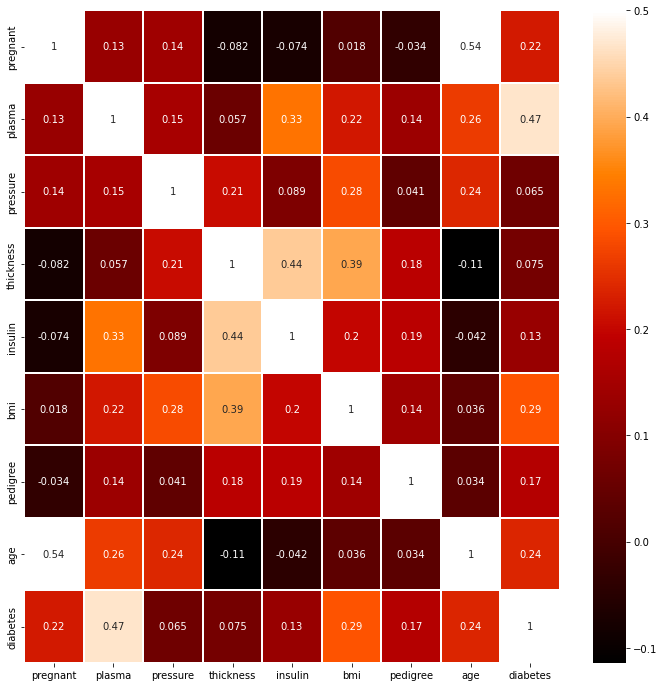

In [8]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

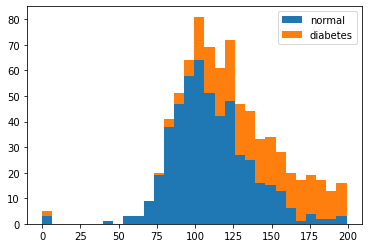

In [9]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()

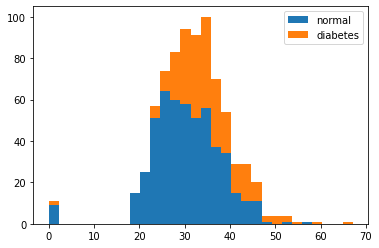

In [10]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()

In [11]:
x = df.iloc[:,0:8]
y = df.iloc[:,8]

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(x, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 1ms/step - loss: 1.0357 - accuracy: 0.4857
Epoch 2/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7251 - accuracy: 0.5781
Epoch 3/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.6302
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.6497
Epoch 5/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6178 - accuracy: 0.6823
Epoch 6/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6090 - accuracy: 0.6875
Epoch 7/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5915 - accuracy: 0.6888
Epoch 8/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5914 - accuracy: 0.7018
Epoch 9/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.7031
Epoch 10/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5852 - accura

154/154 [==============================] - 0s 1ms/step - loss: 0.5137 - accuracy: 0.7461
Epoch 82/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.7513
Epoch 83/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.7357
Epoch 84/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5167 - accuracy: 0.7539
Epoch 85/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5110 - accuracy: 0.7539
Epoch 86/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7552
Epoch 87/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.7539
Epoch 88/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7552
Epoch 89/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5050 - accuracy: 0.7552
Epoch 90/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 

In [16]:
df = pd.read_csv("./iris3.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


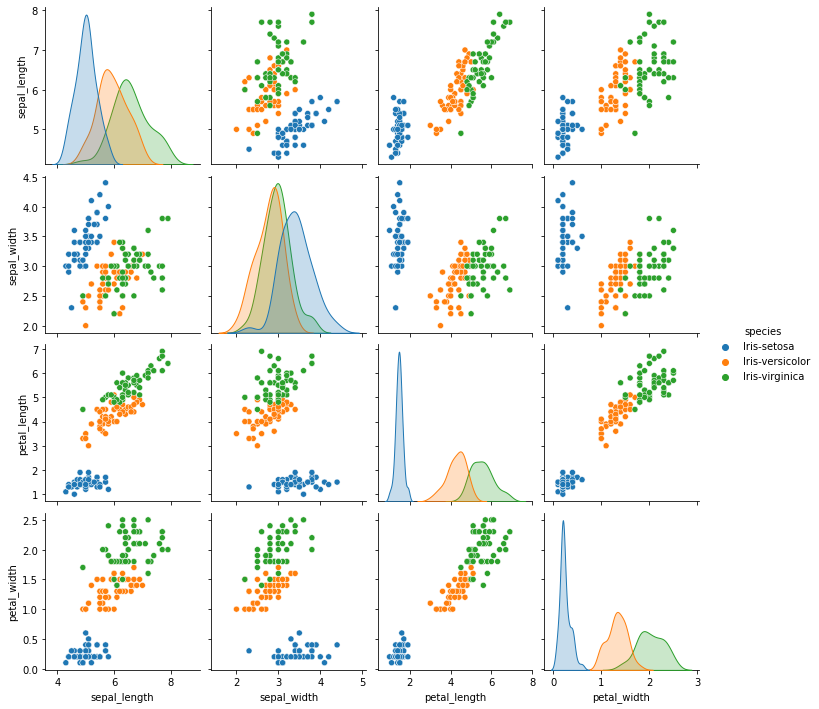

In [17]:
sns.pairplot(df, hue='species')
plt.show()

In [18]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [19]:
print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [20]:
y = pd.get_dummies(y)
print(y[0:5])

   Iris-setosa  Iris-versicolor  Iris-virginica
0            1                0               0
1            1                0               0
2            1                0               0
3            1                0               0
4            1                0               0


In [21]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(X, y, epochs=50, batch_size=5)

Epoch 1/50
30/30 [==============================] - 0s 1ms/step - loss: 1.5252 - accuracy: 0.4133
Epoch 2/50
30/30 [==============================] - 0s 1ms/step - loss: 1.1626 - accuracy: 0.6533
Epoch 3/50
30/30 [==============================] - 0s 1ms/step - loss: 0.9827 - accuracy: 0.6667
Epoch 4/50
30/30 [==============================] - 0s 1ms/step - loss: 0.8785 - accuracy: 0.6667
Epoch 5/50
30/30 [==============================] - 0s 1ms/step - loss: 0.8028 - accuracy: 0.6667
Epoch 6/50
30/30 [==============================] - 0s 1ms/step - loss: 0.7380 - accuracy: 0.6733
Epoch 7/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.6733
Epoch 8/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.7400
Epoch 9/50
30/30 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.7267
Epoch 10/50
30/30 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.7333
Epoch 11/50
30/30 [